In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Load in the data
data = pd.read_csv('../input/moore-law/moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

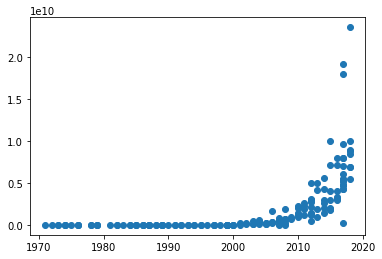

In [3]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

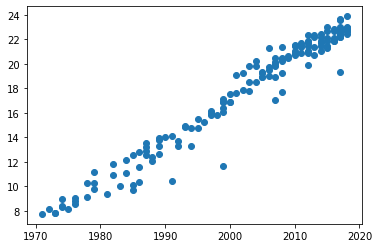

In [4]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [5]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()


In [6]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')


# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN='hyper,hyper'
   KMP_REDUCTION_BARRIER='1,1'
  

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 405.2039
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 327.2491
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 247.0356
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 204.2453
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 174.9512
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 138.0818
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 86.7780
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 63.5052
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 51.5740
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 34.6747
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 25.0678
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 23.5557
Epoch 13/200
6/6 [=========================

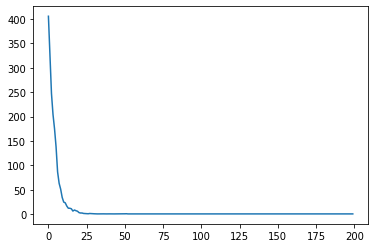

In [7]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [8]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
#print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3478175]], dtype=float32), array([17.770988], dtype=float32)]


In [9]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.3478175


In [10]:
print("Time to double:", np.log(2) / a)

Time to double: 1.9928472831332922


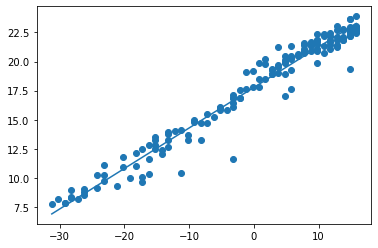

In [11]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)